In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt

# Enable src imports
sys.path.append('../')

from src.data.fetch_data import fetch_asset_data


In [2]:
# defining tickers and fetch data function
tickers = ['AAPL', 'BTC-USD', '^GSPC']
start_date = '2015-01-01'
data_dir = '../data'

# Fetch and save data as CSVs
fetch_asset_data(tickers, start_date=start_date, save_dir=data_dir)


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


saved AAPL


[*********************100%***********************]  1 of 1 completed


saved BTC-USD


[*********************100%***********************]  1 of 1 completed


saved ^GSPC


In [3]:
# Loading data from CSVs
raw_data = {}

for ticker in tickers:
    path = os.path.join(data_dir, f"{ticker.replace('^', '')}.csv")
    
    # Read CSV with multi-level header (2 rows)
    df = pd.read_csv(path, header=[0, 1, 2])
    
    # Flatten columns
    df.columns = [col[0] if col[0] == 'Date' else f"{col[0]}_{col[1]}" for col in df.columns]
    
    # Print column names to debug
    print(f"Columns in {ticker} DataFrame: {df.columns.tolist()}")
    
    # Based on the output, we can see that Price_Ticker contains the dates
    # Rename Price_Ticker to Date if it exists
    if 'Price_Ticker' in df.columns:
        df = df.rename(columns={'Price_Ticker': 'Date'})
    # If not, look for any column containing 'Date'
    else:
        date_col = [col for col in df.columns if 'Date' in col]
        if date_col:
            df = df.rename(columns={date_col[0]: 'Date'})
        else:
            # If still no Date column found, examine the DataFrame
            print(f"No Date column found in {ticker}. First few rows:")
            print(df.head())
            raise ValueError(f"Could not identify Date column in {ticker} CSV")
    
    # Parse date column and set as index
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index('Date')

    # Extracting the correct 'Close' column
    close_cols = [col for col in df.columns if 'Close' in col]
    if close_cols:
        close_col = close_cols[0]
        df = df[[close_col]].rename(columns = {close_col: "Close"})
        raw_data[ticker] = df
    else:
        print(f"No Close column found in {ticker}. Available columns: {df.columns.tolist()}")
        raise ValueError(f"Could not identify Close column in {ticker} CSV")

Columns in AAPL DataFrame: ['Price_Ticker', 'Close_AAPL', 'High_AAPL', 'Low_AAPL', 'Open_AAPL', 'Volume_AAPL']
Columns in BTC-USD DataFrame: ['Price_Ticker', 'Close_BTC-USD', 'High_BTC-USD', 'Low_BTC-USD', 'Open_BTC-USD', 'Volume_BTC-USD']
Columns in ^GSPC DataFrame: ['Price_Ticker', 'Close_^GSPC', 'High_^GSPC', 'Low_^GSPC', 'Open_^GSPC', 'Volume_^GSPC']


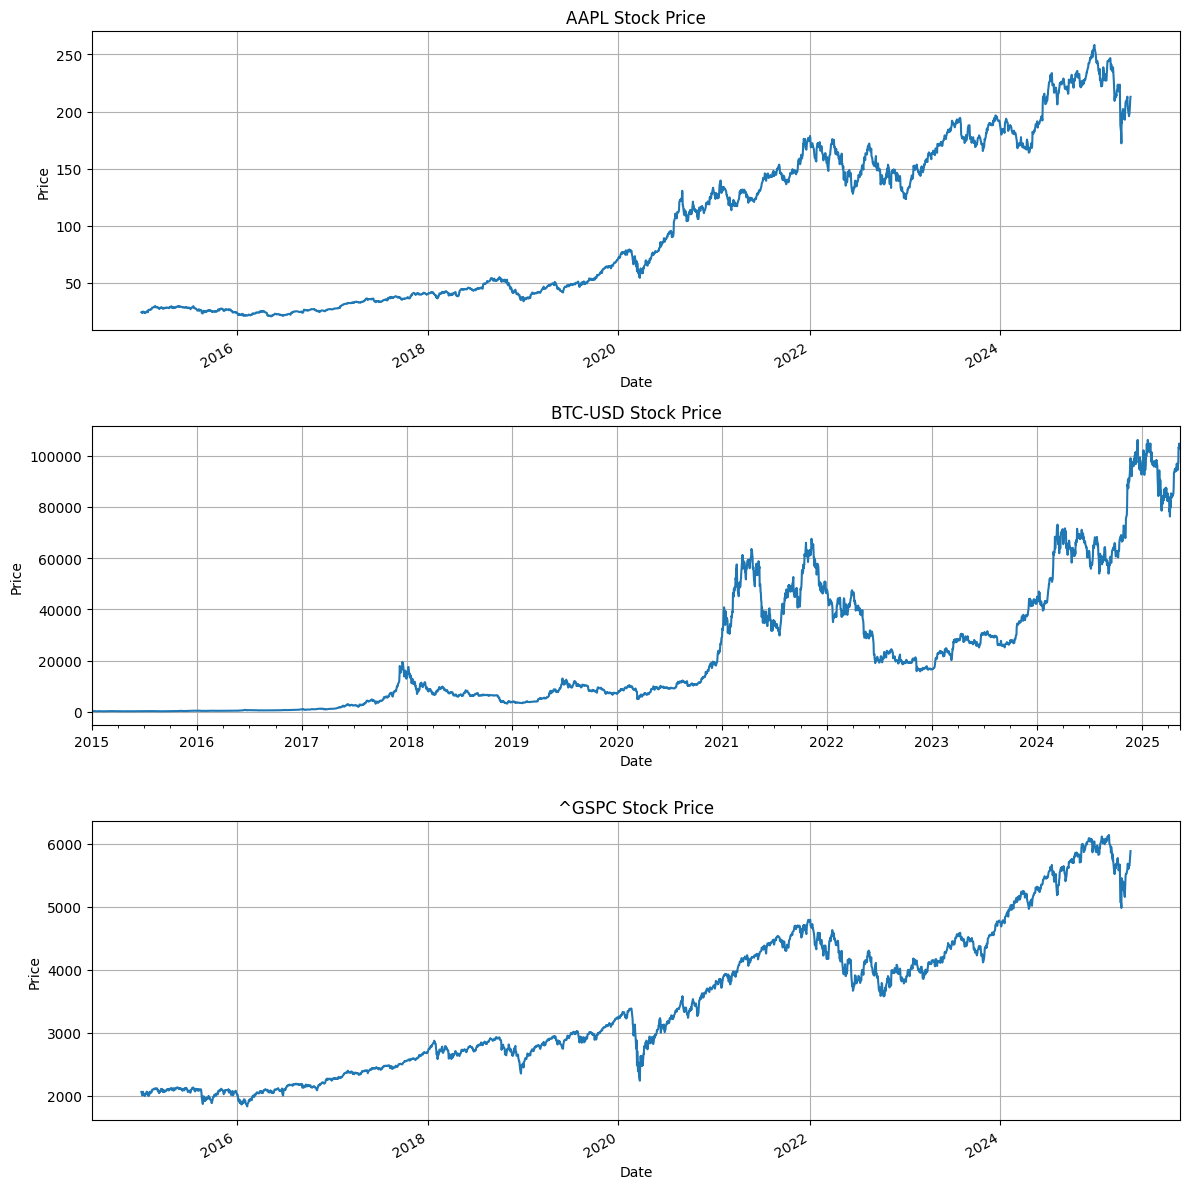

In [4]:
# plot charts
# Create a figure with subplots for each ticker
fig, axes = plt.subplots(len(tickers), 1, figsize=(12, 4*len(tickers)))
if len(tickers) == 1:
    axes = [axes]

# Plot each ticker's data
for ax, (ticker, data) in zip(axes, raw_data.items()):
    data['Close'].plot(ax=ax)
    ax.set_title(f'{ticker} Stock Price')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [6]:
# Calculate summary statistics for each ticker
summary_stats = {}
for ticker, data in raw_data.items():
    stats = {
        'Mean': data['Close'].mean(),
        'Std Dev': data['Close'].std(),
        'Min': data['Close'].min(), 
        'Max': data['Close'].max(),
        'Start Price': data['Close'].iloc[0],
        'End Price': data['Close'].iloc[-1],
        'Total Return %': ((data['Close'].iloc[-1] - data['Close'].iloc[0]) / data['Close'].iloc[0] * 100)
    }
    summary_stats[ticker] = stats

# Convert to DataFrame and display
summary_df = pd.DataFrame(summary_stats).round(2)
print("\nSummary Statistics:")
print(summary_df)



Summary Statistics:
                  AAPL    BTC-USD    ^GSPC
Mean             98.45   22682.99  3438.87
Std Dev          68.58   25586.62  1152.57
Min              20.65     178.10  1829.08
Max             258.40  106146.27  6144.15
Start Price      24.29     314.25  2058.20
End Price       212.93  104384.35  5886.55
Total Return %  776.67   33117.08   186.00


### Notebook 01 Recap
- This notebook performs stock price analysis for multiple tickers by:

1. Fetching historical price data for specified stock tickers
2. Visualizing the price trends through time series plots
3. Calculating key statistics including:
   - Mean price
   - Standard deviation
   - Minimum and maximum prices
   - Starting and ending prices
   - Total percentage return

- The visualizations show the price movements over time for each stock, while the summary statistics provide quantitative insights into the price behavior and overall performance of each security.
